In [1]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Data Pre-processing

In [2]:
# Loan data and check dimensions
HeartAtkData = pd.read_csv("heart_2022_with_nans.csv")
HeartAtkData.shape

(445132, 40)

In [3]:
# Remove observations with NA response values
ResponseVar = "HadHeartAttack"

HeartAtkData_CleanResponse = HeartAtkData.dropna(subset=[ResponseVar])
HeartAtkData_CleanResponse.shape

(442067, 40)

In [4]:
# Convert Race Ethnicity Categories to shorter strings
RaceEthnicityCategory_abbr = {
    'White only, Non-Hispanic': 'White',
    'Black only, Non-Hispanic': 'Black',
    'Other race only, Non-Hispanic': 'Other',
    'Multiracial, Non-Hispanic': 'Multiracial',
    'Hispanic': 'Hispanic'
}

HeartAtkData_CleanResponse.loc[:,"RaceEthnicityCategory"] = HeartAtkData_CleanResponse.RaceEthnicityCategory.str.strip().map(RaceEthnicityCategory_abbr)

In [5]:
# Convert Age Categories to shorter strings
AgeCategory_abbr = {
    'Age 80 or older': '80+',
    'Age 75 to 79': '75-79',
    'Age 70 to 74': '70-74',
    'Age 65 to 69': '65-69',
    'Age 60 to 64': '60-64',
    'Age 55 to 59': '55-59',
    'Age 50 to 54': '50-54',
    'Age 45 to 49': '45-49',
    'Age 40 to 44': '40-44',
    'Age 35 to 39': '35-39',
    'Age 30 to 34': '30-34',
    'Age 25 to 29': '25-29',
    'Age 18 to 24': '18-24'
}
HeartAtkData_CleanResponse.loc[:,"AgeCategory"] = HeartAtkData_CleanResponse.AgeCategory.str.strip().map(AgeCategory_abbr)

In [6]:
# Convert State Categories to shorter strings
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI',
    'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY', 'Guam': 'GU', 'Puerto Rico': 'PR',
    'Virgin Islands': 'VI'}

HeartAtkData_CleanResponse.loc[:,"State"] = HeartAtkData_CleanResponse.State.str.strip().map(state_abbreviations)

In [7]:
# Convert Last check up time Categories to shorter strings
LastCheckupTime_abbr = {
    'Within past year (anytime less than 12 months ago)': '0-1y',
    'Within past 2 years (1 year but less than 2 years ago)': '1-2y',
    'Within past 5 years (2 years but less than 5 years ago)': '2-5y',
    '5 or more years ago': '5y+'
}
HeartAtkData_CleanResponse.loc[:,"LastCheckupTime"] = HeartAtkData_CleanResponse.LastCheckupTime.str.strip().map(LastCheckupTime_abbr)

In [8]:
# Convert Removed Teeth Categories to shorter strings
RemovedTeeth_abbr = {
    'None of them': 'None',
    '1 to 5': '1 to 5',
    '6 or more, but not all': 'More than 6',
    'All': 'All'
}
HeartAtkData_CleanResponse.loc[:,"RemovedTeeth"] = HeartAtkData_CleanResponse.RemovedTeeth.str.strip().map(RemovedTeeth_abbr)

In [9]:
# Convert HadDiabeties Categories to shorter strings
HadDiabetes_abbr = {
    'Yes': 'Yes',
    'No': 'No',
    'No, pre-diabetes or borderline diabetes': 'No but close',
    'Yes, but only during pregnancy (female)': 'Yes but'
}
HeartAtkData_CleanResponse.loc[:,"HadDiabetes"] = HeartAtkData_CleanResponse.HadDiabetes.str.strip().map(HadDiabetes_abbr)

In [10]:
# Convert Smoker Status Categories to shorter strings
SmokerStatus_abbr = {
    'Never smoked': 'Never',
    'Current smoker - now smokes some days': 'some days',
    'Current smoker - now smokes every day': 'every day',
    'Former smoker': 'Former'
}
HeartAtkData_CleanResponse.loc[:,"SmokerStatus"] = HeartAtkData_CleanResponse.SmokerStatus.str.strip().map(SmokerStatus_abbr)

In [11]:
# Convert E-Cigarette Ussage Categories to shorter strings
ECigaretteUsage_abbr = {
    'Not at all (right now)': 'Not right now',
    'Never used e-cigarettes in my entire life': 'Never',
    'Use them every day': 'Every day',
    'Use them some days': 'Some days'
}
HeartAtkData_CleanResponse.loc[:,"ECigaretteUsage"] = HeartAtkData_CleanResponse.ECigaretteUsage.str.strip().map(ECigaretteUsage_abbr)

In [12]:
# Convert Tetanus Categories to shorter strings
TetanusLast10Tdap_abbr = {
    'Yes, received tetanus shot but not sure what type': 'Yes but not sure',
    'No, did not receive any tetanus shot in the past 10 years': 'No',
    'Yes, received Tdap': 'Yes Tdap',
    'Yes, received tetanus shot, but not Tdap': 'Yes not Tdap'
}
HeartAtkData_CleanResponse.loc[:,"TetanusLast10Tdap"] = HeartAtkData_CleanResponse.TetanusLast10Tdap.str.strip().map(TetanusLast10Tdap_abbr)

In [13]:
# Convert Covid Positive Categories to shorter strings
CovidPos_abbr = {
    'Yes': 'Yes',
    'No': 'No',
    'Tested positive using home test without a health professional': 'Yes, tested positive at home'
}
HeartAtkData_CleanResponse.loc[:,"CovidPos"] = HeartAtkData_CleanResponse.CovidPos.str.strip().map(CovidPos_abbr)

## Exploratory Data Analysis


In [14]:
columns = HeartAtkData_CleanResponse.columns.tolist()
for feature in columns:
    print(feature, HeartAtkData_CleanResponse[feature].unique(), end='\n\n')

State ['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY' 'GU' 'PR' 'VI']

Sex ['Female' 'Male']

GeneralHealth ['Very good' 'Excellent' 'Fair' 'Poor' 'Good' nan]

PhysicalHealthDays [ 0.  2.  1.  8.  5. 30.  4. 23. 14. nan 15.  3. 10.  7. 25.  6. 21. 20.
 29. 16.  9. 27. 28. 12. 13. 11. 26. 17. 24. 19. 18. 22.]

MentalHealthDays [ 0.  3.  9.  5. 15. 20. 14. 10. 18.  1. nan  2. 30.  4.  6.  7. 25.  8.
 22. 29. 27. 21. 12. 28. 16. 13. 26. 17. 11. 23. 19. 24.]

LastCheckupTime ['0-1y' nan '1-2y' '2-5y' '5y+']

PhysicalActivities ['No' 'Yes' nan]

SleepHours [ 8.  6.  5.  7.  9.  4. 10.  1. 12. nan 18.  3.  2. 11. 16. 15. 13. 14.
 20. 23. 17. 24. 22. 19. 21.]

RemovedTeeth [nan 'None' '1 to 5' 'More than 6' 'All']

HadHeartAttack ['No' 'Yes']

HadAngina ['No' 'Yes' nan]

HadStroke ['No

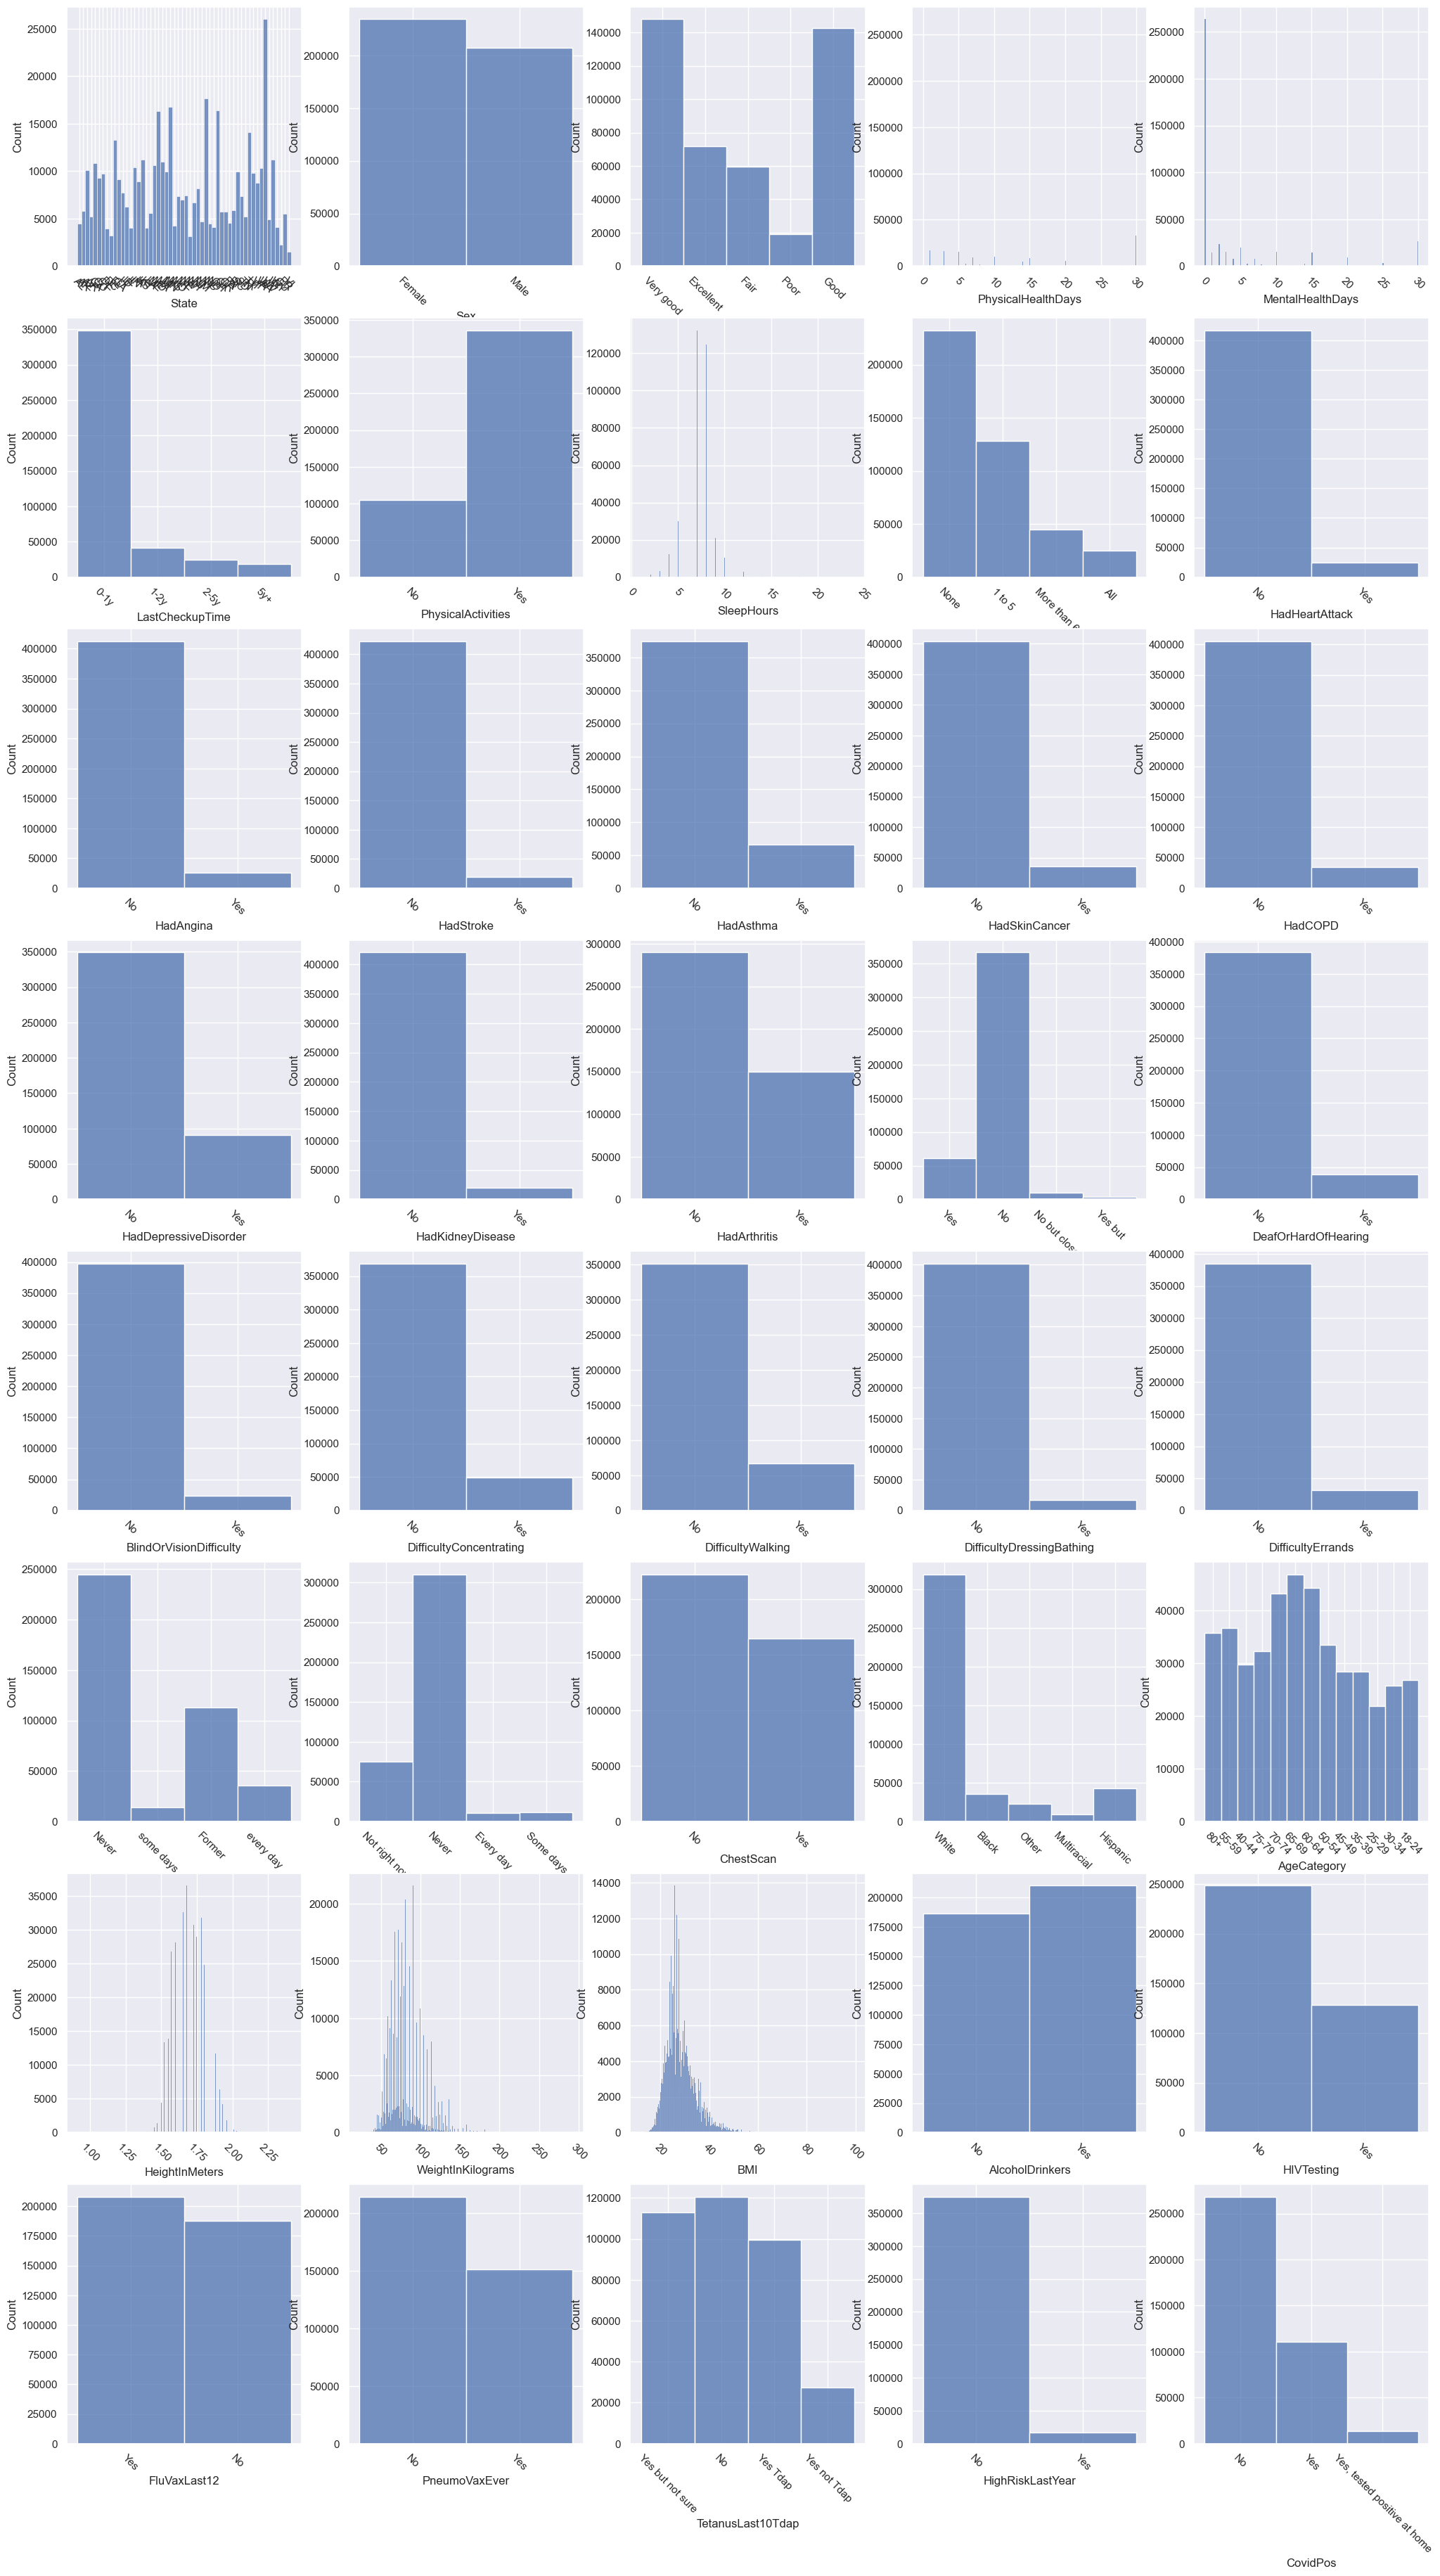

In [16]:
sns.set_theme(style='darkgrid')
ncols = 5
nrows = 8
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 45))
for i, feature in enumerate(columns):
    row, col = divmod(i, ncols) # Return the tuple (x//y, x%y)
    sns.histplot(HeartAtkData_CleanResponse[feature], kde=False, ax=axes[row, col])
    axes[row, col].grid(visible=True)
    for label in axes[row, col].get_xticklabels():
        label.set_rotation(-45)
#plt.tight_layout(pad=0.5)
plt.show()

## Split Data to Feature Matrix and Response Vector

In [ ]:
response = HeartAtkData_CleanResponse[ResponseVar]
featureMatrix = HeartAtkData_CleanResponse.drop(ResponseVar,axis=1)

response.shape, featureMatrix.shape

## Train - Validation - Test Split

In [ ]:
# Split Complete Feature Matrix and Response Vector to Train (80%) and Temp (20%)
featureMatrix_Train, featureMatrix_Temp, response_Train, response_Temp = train_test_split(featureMatrix,response, test_size= 0.2, random_state=0)

# Further Split Temp Feature Matrix and Temp Response Vector to 20% each for Validation and Test Data
featureMatrix_Validation, featureMatrix_Test, response_Validation, response_Test = train_test_split(featureMatrix_Temp,response_Temp, test_size= 0.5, random_state=0)

# Check shape of Feature Matrices and Response Vectors
print("Train Data: ", featureMatrix_Train.shape, response_Train.shape)
print("Validataion Data: ", featureMatrix_Validation.shape, response_Validation.shape)
print("Test Data: ", featureMatrix_Test.shape, response_Test.shape)

In [ ]:
# Check distribution of classes in the response variable over the 3 data sets
valueCounts_Train = response_Train.value_counts()
positiveRatio_Train = valueCounts_Train.get("Yes",0) / len(response_Train)

valueCounts_Validation = response_Validation.value_counts()
positiveRatio_Validation = valueCounts_Validation.get("Yes",0) / len(response_Validation)

valueCounts_Test = response_Test.value_counts()
positiveRatio_Test = valueCounts_Test.get("Yes",0) / len(response_Test)

print(f"Training Data Positive % = {positiveRatio_Train:f}")
print(f"Validation Data Positive % = {positiveRatio_Validation:f}")
print(f"Test Data Positive % = {positiveRatio_Test:f}")

# Output

In [ ]:
# Concatenate Feature Matrix and Response vectors into 1 dataframe per dataset
trainData_Clean = pd.concat([featureMatrix_Train, response_Train] , axis=1)
validationData_Clean = pd.concat([featureMatrix_Validation, response_Validation] , axis=1)
testData_Clean = pd.concat([featureMatrix_Test, response_Test] , axis=1)

# Save to csv files
trainData_Clean.to_csv('trainData_Cleanv2.csv', index=False)
validationData_Clean.to_csv('validationData_Cleanv2.csv', index=False)
testData_Clean.to_csv('testData_Cleanv2.csv', index=False)